In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [18]:
data = pd.read_excel("C:\\Users\\Phil\\CaseStudy\\PSP_DATA_PREP.xlsx")

data_success = data[data['success'] == 1]
data_fail = data[data['success'] == 0]

data = pd.get_dummies(data, columns=['PSP'], dtype=int)

data.head()

,tmsp,attempts,success,3D_secured,fee,hour,day_of_week,month,amount_norm,country_Austria,country_Germany,country_Switzerland,card_Diners,card_Master,card_Visa,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card
0,2019-01-01 00:01:11,2,1,0,4.0,0,1,1,0.133013,0,1,0,0,0,1,0,0,0,1
1,2019-01-01 00:02:49,2,1,1,4.0,0,1,1,0.371795,0,1,0,1,0,0,0,0,0,1
2,2019-01-01 00:04:33,1,0,0,0.5,0,1,1,0.189103,1,0,0,1,0,0,0,0,1,0
3,2019-01-01 00:06:41,2,0,0,1.5,0,1,1,0.442308,0,0,1,0,1,0,0,0,1,0
4,2019-01-01 00:08:46,1,1,0,3.0,0,1,1,0.177885,0,1,0,0,1,0,0,0,0,1


In [3]:
# Define the feature matrix X and target y, and split data into training and testing sets
X = data.drop(columns=['success', 'fee', 'attempts', 'tmsp'])
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
# create a function to evaluate the models
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return [accuracy, precision, recall, f1]

Accuracy: 0.6415508412582297
Precision: 0.5505350772889417
Recall: 0.22640586797066015
F1: 0.32085932085932084


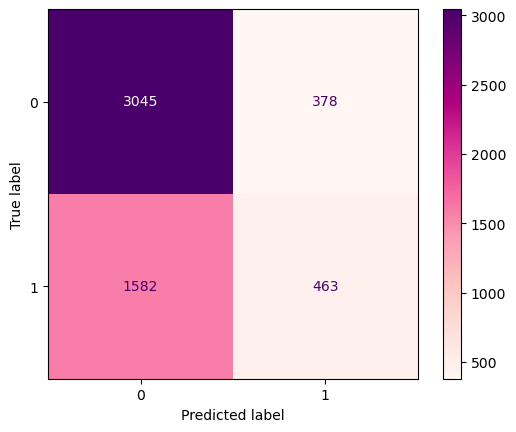

In [5]:
# Train a logistic regression model and make a prediction
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

# Evaluate the model 
score_log = evaluate(y_test, y_pred)
print(f"Accuracy: {score_log[0]}\nPrecision: {score_log[1]}\nRecall: {score_log[2]}\nF1: {score_log[3]}")

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [6]:
# Create a class balanced data set with SMOTE to retrain models on
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Accuracy: 0.6287490855888808
Precision: 0.5031525851197982
Recall: 0.5853300733496333
F1: 0.5411392405063291


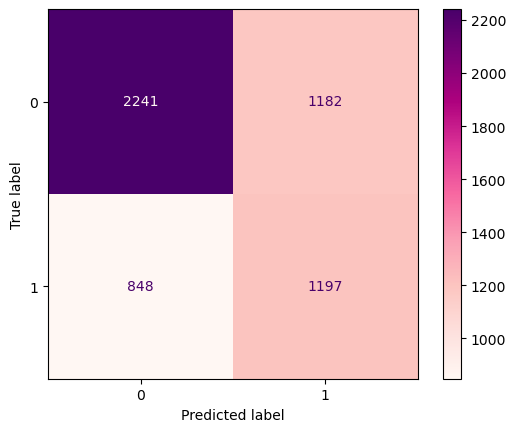

In [7]:
# Train a new logistic regression model with SMOTE balanced classes
smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)
smote_y_pred = smote_model.predict(X_test)

# Evalute Accuracy
score_log_bal = evaluate(y_test, smote_y_pred)
print(f"Accuracy: {score_log_bal[0]}\nPrecision: {score_log_bal[1]}\nRecall: {score_log_bal[2]}\nF1: {score_log_bal[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, smote_y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')
plt.show()

Accuracy: 0.6464886613021215
Precision: 0.5332936979785969
Recall: 0.4386308068459658
F1: 0.48135229407029784


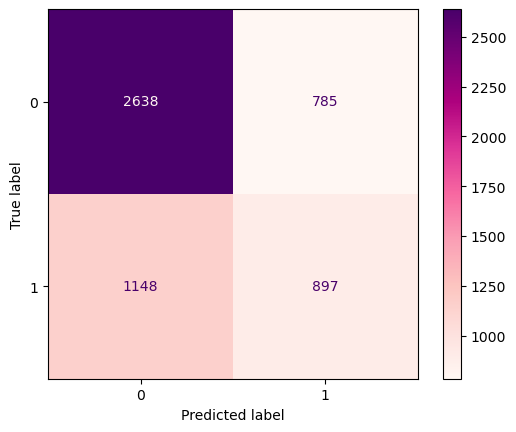

In [8]:
#Random forest model without SMOTE balanced classes
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#assess accuracy
score_rf = evaluate(y_test, y_pred_rf)
print(f"Accuracy: {score_rf[0]}\nPrecision: {score_rf[1]}\nRecall: {score_rf[2]}\nF1: {score_rf[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6464886613021215
Precision: 0.5332936979785969
Recall: 0.4386308068459658
F1: 0.48135229407029784


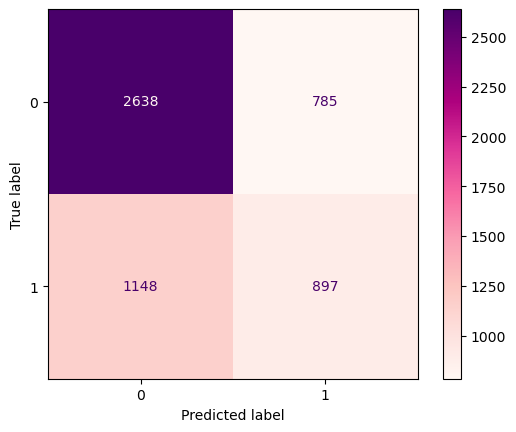

In [9]:
#Random forest model with scikit balanced
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_model.predict(X_test)

#assess accuracy
score_rf_bal = evaluate(y_test, y_pred_rf_balanced)
print(f"Accuracy: {score_rf_bal[0]}\nPrecision: {score_rf_bal[1]}\nRecall: {score_rf_bal[2]}\nF1: {score_rf_bal[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_balanced)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.630760790051207
Precision: 0.5059687786960514
Recall: 0.5388753056234719
F1: 0.5219038598152972


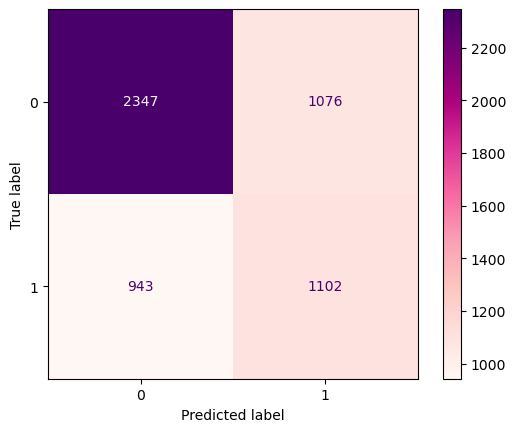

In [10]:
#Train Random forest Model with SMOTE balanced classes
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model_smote.predict(X_test)

#Assess accuracy for randomforest model
score_rf_smote = evaluate(y_test, y_pred_rf_smote)
print(f"Accuracy: {score_rf_smote[0]}\nPrecision: {score_rf_smote[1]}\nRecall: {score_rf_smote[2]}\nF1: {score_rf_smote[3]}")

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_smote)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6719092904169714
Precision: 0.557860765329645
Recall: 0.5916870415647921
F1: 0.5742762221167537


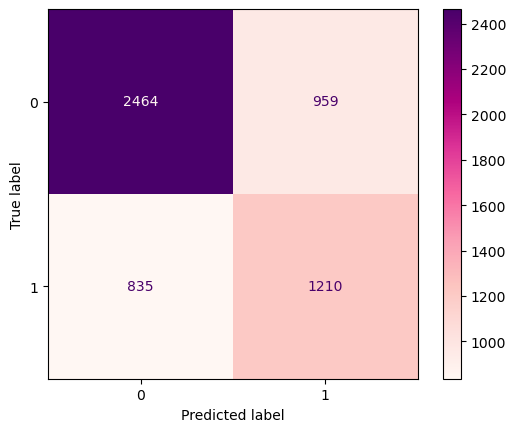

In [11]:
# Train a model with gradient boosting
gb_model = GradientBoostingClassifier(random_state=42, max_depth=3)
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model.predict(X_test)

# Evalutate Accuracy
score_gb = evaluate(y_test, y_pred_gb)
print(f"Accuracy: {score_gb[0]}\nPrecision: {score_gb[1]}\nRecall: {score_gb[2]}\nF1: {score_gb[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

Accuracy: 0.6384418434528164
Precision: 0.5787037037037037
Recall: 0.12224938875305623
F1: 0.20185708518368994


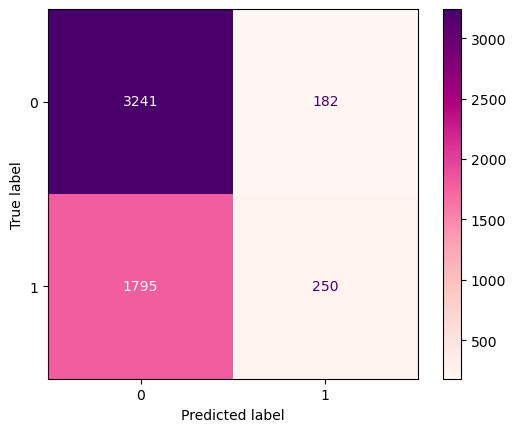

In [12]:
# Train a model using SVM
# Need a scalar for the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM
svm_classifier = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evalutate Accuracy
score_svm = evaluate(y_test, y_pred_svm)
print(f"Accuracy: {score_svm[0]}\nPrecision: {score_svm[1]}\nRecall: {score_svm[2]}\nF1: {score_svm[3]}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [13]:
results = pd.DataFrame()
results['Key'] = ['Accuracy', 'Precision', 'Recall', 'F1']
results['Logistic'] = score_log
results['Logistic_Balanced'] = score_log_bal
results['RandomForest'] = score_rf
results['RandomForest_Balanced'] = score_rf_bal
results['RandomForest_SMOTE'] = score_rf_smote
results['GradientBoosting'] = score_gb
results.T

,0,1,2,3
Key,Accuracy,Precision,Recall,F1
Logistic,0.641551,0.550535,0.226406,0.320859
Logistic_Balanced,0.628749,0.503153,0.58533,0.541139
RandomForest,0.646489,0.533294,0.438631,0.481352
RandomForest_Balanced,0.646489,0.533294,0.438631,0.481352
RandomForest_SMOTE,0.630761,0.505969,0.538875,0.521904
GradientBoosting,0.671909,0.557861,0.591687,0.574276


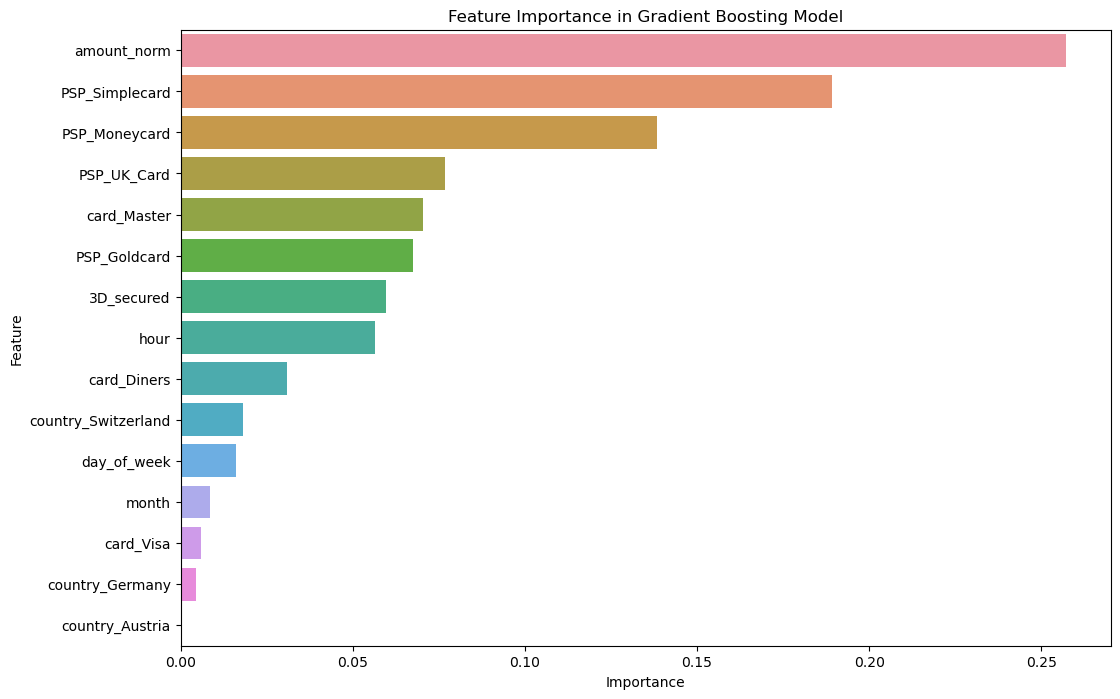

,Feature,Importance
4,amount_norm,0.257244
13,PSP_Simplecard,0.189292
12,PSP_Moneycard,0.138441
14,PSP_UK_Card,0.076888
9,card_Master,0.070401
11,PSP_Goldcard,0.067471
0,3D_secured,0.059520
1,hour,0.056508
8,card_Diners,0.031014
7,country_Switzerland,0.017996


In [14]:
feature_importances = gb_model.feature_importances_
features = X.columns

feature_importance_gb = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb)
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_gb

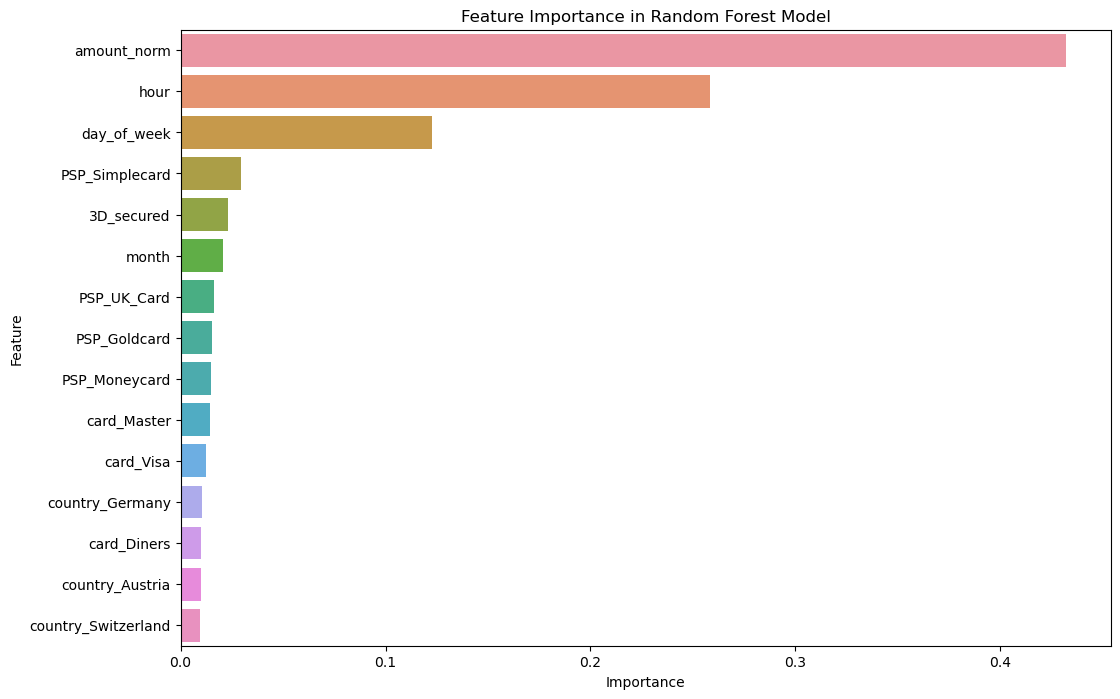

,Feature,Importance
4,amount_norm,0.432259
1,hour,0.258335
2,day_of_week,0.122770
13,PSP_Simplecard,0.029464
0,3D_secured,0.023324
3,month,0.020489
14,PSP_UK_Card,0.016278
11,PSP_Goldcard,0.015339
12,PSP_Moneycard,0.014767
9,card_Master,0.014502


In [15]:
feature_importances = rf_model_smote.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df

In [22]:
data_success['fee'].describe()

count    10225.000000
mean         4.909340
std          3.075233
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         23.000000
Name: fee, dtype: float64

In [29]:
X = data_success.drop(columns=['success', 'fee', 'attempts', 'tmsp', 'PSP'])
y = data_success['PSP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

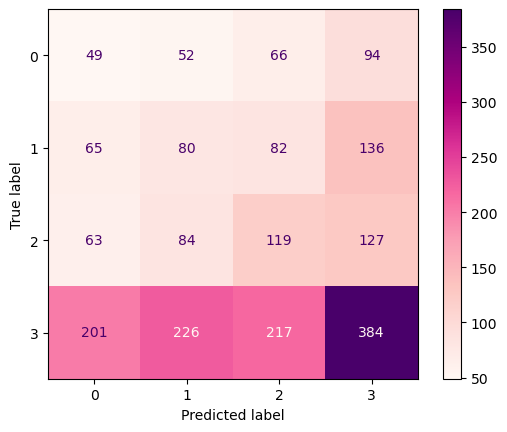

In [33]:
#Train Random forest Model with SMOTE balanced classes
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
y_pred = dt_model.predict(X_test)

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')

In [35]:
from sklearn.neighbors import KNeighborsClassifier

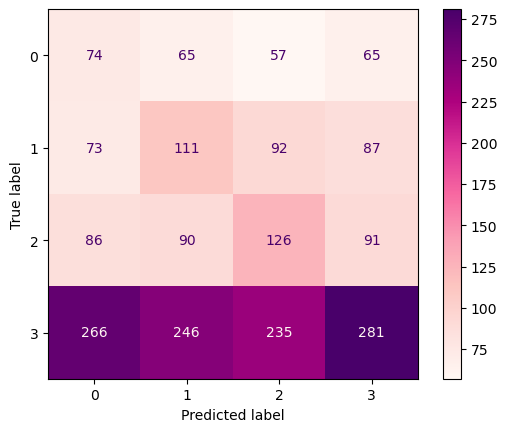

In [39]:
kneighbors = KNeighborsClassifier(n_neighbors=5)
kneighbors.fit(X_train_smote, y_train_smote)
y_pred = kneighbors.predict(X_test)

#display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='RdPu')